In [2]:
import splitfolders

In [3]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [6]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = "E:/PROJECT MODEL/TEETH DISEASE/TRAINING"
valid_data_dir = "E:/PROJECT MODEL/TEETH DISEASE/VALIDATION"
test_data_dir = "E:/PROJECT MODEL/TEETH DISEASE/TESTING"

In [9]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  validation_split = 0.4)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size = (img_height, img_width),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   subset = 'training')

valid_generator = train_datagen.flow_from_directory(valid_data_dir,
                                                   target_size = (img_height, img_width),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   subset='validation')

Found 238 images belonging to 40 classes.
Found 141 images belonging to 40 classes.


In [10]:
test_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size = (img_height, img_width),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   subset='validation')


Found 141 images belonging to 40 classes.


In [11]:
x,y = test_generator.next()
x.shape

(32, 224, 224, 3)

In [12]:
base_model = ResNet50(include_top = False, weights = 'imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
predictions = Dense(train_generator.num_classes, activation = 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator,
          epochs=10)




Epoch 1/10


2/8 [======>.......................] - ETA: 10s - loss: 5.2552 - accuracy: 0.0000e+00

C:\Users\debjy\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 [==============================] - 18s 2s/step - loss: 5.4376 - accuracy: 0.0420
Epoch 2/10
8/8 [==============================] - 14s 2s/step - loss: 3.2281 - accuracy: 0.2815
Epoch 3/10
8/8 [==============================] - 14s 2s/step - loss: 1.9979 - accuracy: 0.4958
Epoch 4/10
8/8 [==============================] - 14s 2s/step - loss: 1.2318 - accuracy: 0.6723
Epoch 5/10
8/8 [==============================] - 16s 2s/step - loss: 0.9388 - accuracy: 0.7815
Epoch 6/10
8/8 [==============================] - 13s 2s/step - loss: 0.5827 - accuracy: 0.8739
Epoch 7/10
8/8 [==============================] - 13s 2s/step - loss: 0.3920 - accuracy: 0.9202
Epoch 8/10
8/8 [==============================] - 13s 2s/step - loss: 0.3426 - accuracy: 0.9328
Epoch 9/10
8/8 [==============================] - 13s 2s/step - loss: 0.2367 - accuracy: 0.9580
Epoch 10/10
8/8 [==============================] - 13s 2s/step - loss: 0.1533 - accuracy: 0.9832


In [14]:
train_generator.class_indices

{'Abscess': 0,
 'Amelogenesis Imperfecta': 1,
 'Bruxism': 2,
 'Cracked teeth': 3,
 'Dentinogenesis Imperfecta': 4,
 'Flurosis': 5,
 'Hypodontia': 6,
 'Inflammatory gingival Hyperplasia': 7,
 'Internal root resorption': 8,
 'Malocclusion': 9,
 'Microdontia': 10,
 'NOMA': 11,
 'Necrotizing Periodontal': 12,
 'Periodontitis': 13,
 'Pyorrhea': 14,
 'Root caries': 15,
 'Sinus infection': 16,
 "Sjogren's syndrome": 17,
 'Supernemarary teeh': 18,
 'Teeth grinding': 19,
 'Vincent infections': 20,
 'Viral Gingivitis': 21,
 'Wisdom tooth impaction': 22,
 'Xerostomia': 23,
 'Yaws': 24,
 'abrasion': 25,
 'apical periodontitis': 26,
 'bacterial endocarditis': 27,
 'barodontalgia': 28,
 'cemental': 29,
 'cervical': 30,
 'dental procedures': 31,
 'dentin hypersensitivity': 32,
 'erosion': 33,
 'gingivitis': 34,
 'lingual caries': 35,
 'odontoma': 36,
 'sialadenitis': 37,
 'tooth decay': 38,
 'tooth fracture or cracks': 39}

In [15]:
valid_generator.class_indices

{'Abscess': 0,
 'Amelogenesis Imperfecta': 1,
 'Bruxism': 2,
 'Cracked teeth': 3,
 'Dentinogenesis Imperfecta': 4,
 'Flurosis': 5,
 'Hypodontia': 6,
 'Inflammatory gingival Hyperplasia': 7,
 'Internal root resorption': 8,
 'Malocclusion': 9,
 'Microdontia': 10,
 'NOMA': 11,
 'Necrotizing Periodontal': 12,
 'Periodontitis': 13,
 'Pyorrhea': 14,
 'Root caries': 15,
 'Sinus infection': 16,
 "Sjogren's syndrome": 17,
 'Supernemarary teeh': 18,
 'Teeth grinding': 19,
 'Vincent infections': 20,
 'Viral Gingivitis': 21,
 'Wisdom tooth impaction': 22,
 'Xerostomia': 23,
 'Yaws': 24,
 'abrasion': 25,
 'apical periodontitis': 26,
 'bacterial endocarditis': 27,
 'barodontalgia': 28,
 'cemental': 29,
 'cervical': 30,
 'dental procedures': 31,
 'dentin hypersensitivity': 32,
 'erosion': 33,
 'gingivitis': 34,
 'lingual caries': 35,
 'odontoma': 36,
 'sialadenitis': 37,
 'tooth decay': 38,
 'tooth fracture or cracks': 39}

In [16]:
train_generator.num_classes

40

In [17]:
model.save('E:/PROJECT MODEL/TEETH DISEASE/ResNet50_Images.h5')

C:\Users\debjy\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
test_loss, test_acc = model.evaluate(test_generator, verbose = 3)
print('\nTest Accuracy:',test_acc)



Test Accuracy: 0.24113474786281586


In [40]:
import os


In [44]:
for i in os.listdir(test_data_dir):
    img_path = os.path.join(test_data_dir, i)
    img = load_img(img_path, target_size=(512, 256))
    img_array = img_to_array(img)
    plt.imshow(img_array)
    plt.show()
    X = img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    predicted_class = np.argmax(val)

    if predicted_class == 0:
        print("It's a picture of Abrasion")
    elif predicted_class == 1:
        print("It's a picture of Abscess")
    elif predicted_class == 2:
        print("It's a picture of Amelogenesis Imperfecta")
    elif predicted_class == 3:
        print("It's a picture of Apical periodontitis")
    elif predicted_class == 4:
        print("It's a picture of Bacterial endocarditis")
    elif predicted_class == 5:
        print("It's a picture of Barodontalgia")
    elif predicted_class == 6:
        print("It's a picture of Bruxism")
    elif predicted_class == 7:
        print("It's a picture of Cemental")
    elif predicted_class == 8:
        print("It's a picture of Cervical")
    elif predicted_class == 9:
        print("It's a picture of Cracked teeth")
    elif predicted_class == 10:
        print("It's a picture of Dental procedures")
    elif predicted_class == 11:
        print("It's a picture of Dentin hypersensitivity")
    elif predicted_class == 12:
        print("It's a picture of Dentinogenesis Imperfecta")
    elif predicted_class == 13:
        print("It's a picture of Erosion")
    elif predicted_class == 14:
        print("It's a picture of Flurosis")
    elif predicted_class == 15:
        print("It's a picture of Gingivitis")
    elif predicted_class == 16:
        print("It's a picture of Hypodontia")
    elif predicted_class == 17:
        print("It's a picture of Inflammatory gingival Hyperplasia")
    elif predicted_class == 18:
        print("It's a picture of Internal root resorption")
    elif predicted_class == 19:
        print("It's a picture of Internal root resorption")
    elif predicted_class == 20:
        print("It's a picture of Malocclusion")
    elif predicted_class == 21:
        print("It's a picture of Microdontia")
    elif predicted_class == 22:
        print("It's a picture of Necrotizing Periodontal")
    elif predicted_class == 23:
        print("It's a picture of NOMA")
    elif predicted_class == 24:
        print("It's a picture of Odontoma")
    elif predicted_class == 25:
        print("It's a picture of Periodontitis")
    elif predicted_class == 26:
        print("It's a picture of Pyorrhea")
    elif predicted_class == 27:
        print("It's a picture of Root caries")
    elif predicted_class == 28:
        print("It's a picture of Sialadenitis")
    elif predicted_class == 29:
        print("It's a picture of Sinus infection")
    elif predicted_class == 30:
        print("It's a picture of Sjogren's syndrome")
    elif predicted_class == 31:
        print("It's a picture of Supernemarary teeh")
    elif predicted_class == 32:
        print("It's a picture of Teeth grinding")
    elif predicted_class == 33:
        print("It's a picture of Tooth decay")
    elif predicted_class == 34:
        print("It's a picture of Tooth decay")
    elif predicted_class == 35:
        print("It's a picture of Vincent infections")
    elif predicted_class == 36:
        print("It's a picture of Viral Gingivitis")
    elif predicted_class == 37:
        print("It's a picture of Wisdom tooth impaction")
    elif predicted_class == 38:
        print("It's a picture of Xerostomia")
    elif predicted_class == 39:
        print("It's a picture of Yaws")
    

PermissionError: [Errno 13] Permission denied: 'E:/PROJECT MODEL/TEETH DISEASE/TESTING\\Abrasion'

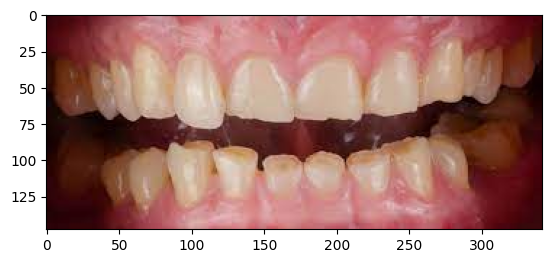

In [43]:
image=plt.imread('E:/PROJECT MODEL/TEETH DISEASE/TESTING/Bruxism/1.jpeg')
plt.imshow(image)